In [33]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [34]:
df=pd.read_csv(r"D:\100 Days machine learning\Function Transformer day 30\train.csv",usecols=['Age','Fare','Survived'])

In [35]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [37]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\avani\AppData\Local\Temp\ipykernel_19788\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [38]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [39]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\avani\AppData\Local\Temp\ipykernel_19788\3009068236.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


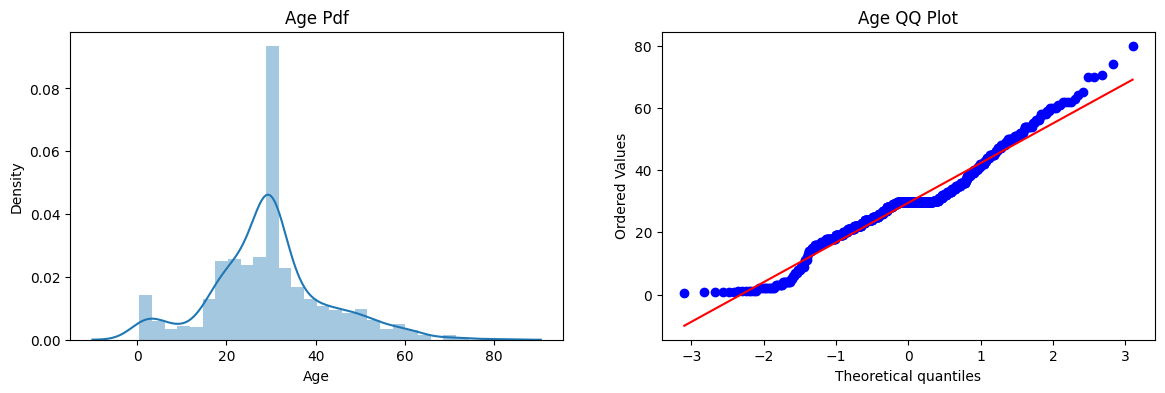

In [41]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age Pdf')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

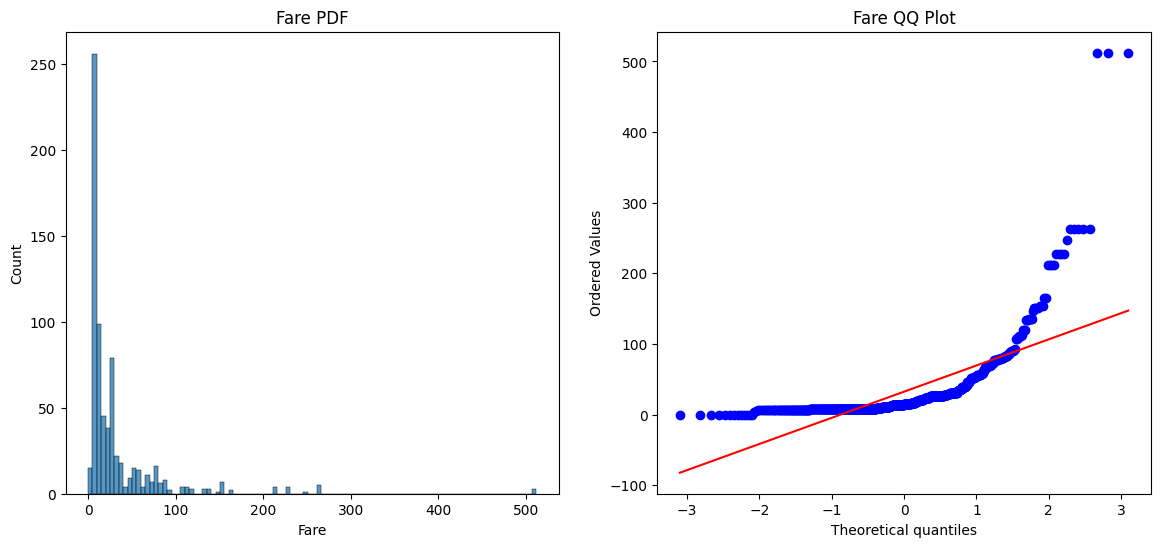

In [42]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.histplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [43]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

In [44]:
clf.fit(X_train,y_train)
clf1.fit(X_train,y_train)

clf_pred=clf.predict(X_test)
clf1_pred=clf1.predict(X_test)

print(accuracy_score(clf_pred,y_test))
print(accuracy_score(clf1_pred,y_test))

0.6480446927374302
0.664804469273743


In [45]:
trf=FunctionTransformer(func=np.log1p)

In [46]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [50]:
clf=LogisticRegression()
clf1=DecisionTreeClassifier()

In [51]:
clf.fit(X_train_transformed,y_train)
clf1.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [54]:
y_pred=clf.predict(X_test)
y_pred1=clf1.predict(X_test)

In [55]:
print(accuracy_score(y_pred,y_test))
print(accuracy_score(y_pred1,y_test))

0.7374301675977654
0.5921787709497207


In [59]:
X_transformed = trf.fit_transform(X_train)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y_train,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y_train,scoring='accuracy',cv=10)))

LR 0.6783646322378717
DT 0.620735524256651


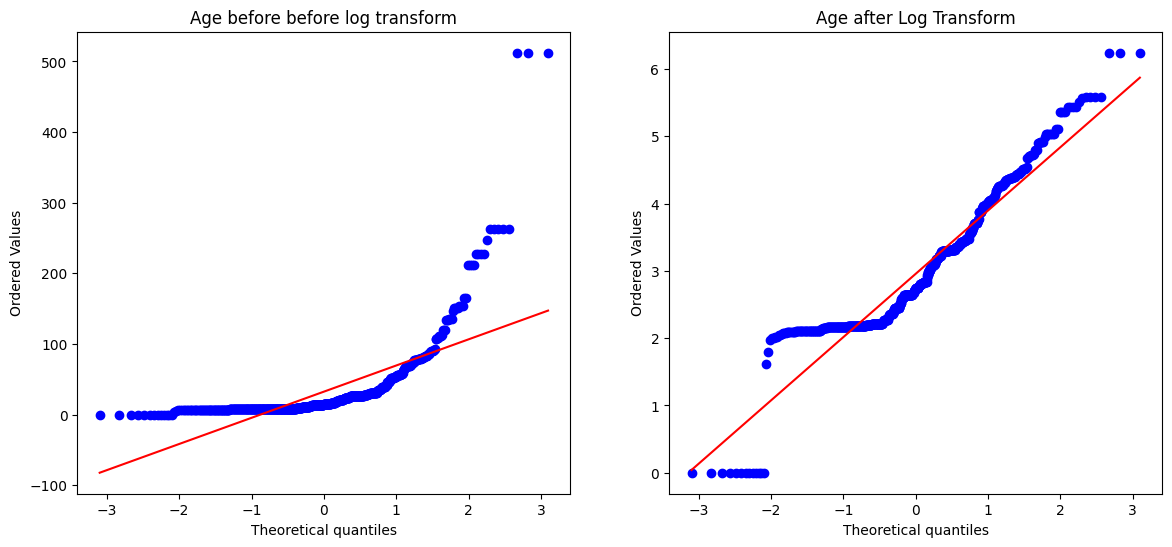

In [62]:
plt.figure(figsize=(14,6))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Age before before log transform')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Age after Log Transform')
plt.show()

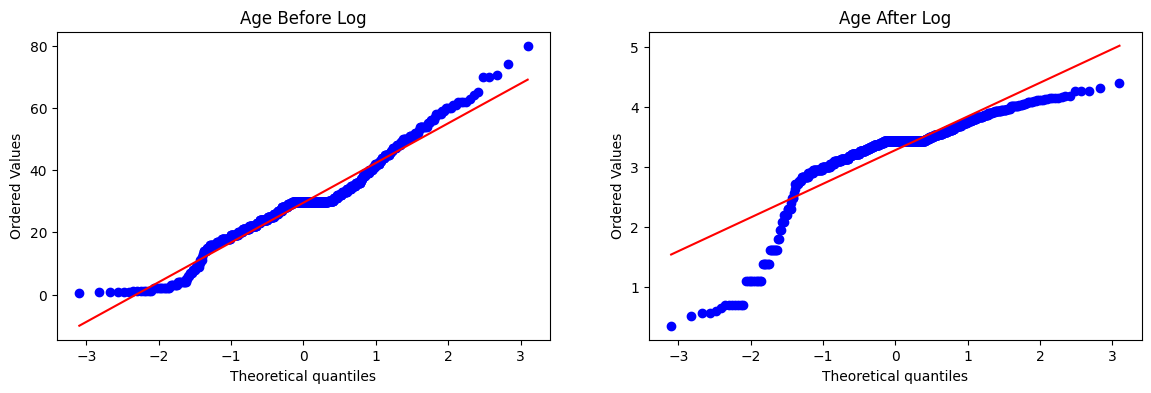

In [63]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [65]:
trf2=ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

In [66]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [67]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))


Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [111]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    # X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    trf=ColumnTransformer([('trf',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    X_trans = trf.fit_transform(X)
    # X_train_transformed=trf.fit_transform(X_train)
    # X_test_transformed=trf.transform(X_test)
    clf=LogisticRegression()
    print("accuracy:",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    # y_pred=clf.predict(X_test_transformed)
    # print(accuracy_score(y_pred,y_test))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

accuracy: 0.6712609238451936


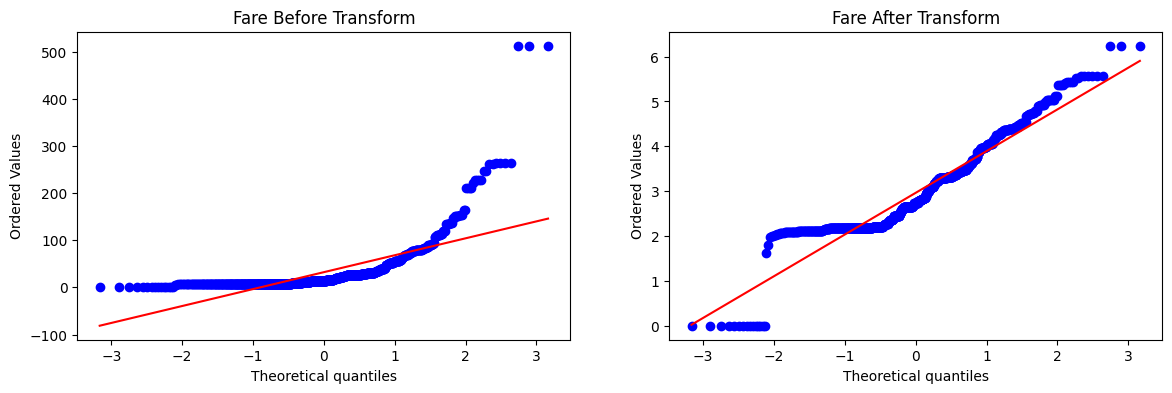

In [112]:
apply_transform(np.log1p)
